# Data Exploration
- UrsaMinor Jupyeter Notebook
- January 12, 2021
- Kerry Wong

# Table of Contents
1. [Packages](#importpackages)
2. [Data](#rawdata)
3. [Cleaning Data](#cleaning)
4. [Section Score Comparisons](#scorecomparisons)
5. [Location Comparisons](#locations)
    1. [Boroughs](#borough)
        1. [Data Exploration](#dataexplore)
        2. [Visualizations](#bvis)
        3. [ANOVA Testing](#ANOVA)
    2. [Zip Codes](#zip)
        1. [Data Exploration](#zipde)
        1. [Correlation](#corr)
        2. [Visualizations](#zipvis)
6. [Race](#race)
    1. [Correlations](#racecorr)
    2. [Visualizations](#racevis)
7. [Conclusion](#conclusion)
    1. [Final Conclusions](#finc)
    2. [Possible Explanations](#poss)
    3. [Limitations](#lim)

# Import Packages <a name="importpackages"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Importing Raw Data <a name="rawdata"></a>

This data is from NYC Open Data on Kaggle. The data set includes a row for each accredited high school in New York City. The high school data is from the New York City Department of Education, and information regarding SAT scores and testing rates were published by the College Board. 

In [2]:
rawdata = pd.read_csv('data/scores.csv')
rawdata

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


# Cleaning Data <a name="cleaning"></a>
I cleaned the data by dropping all the data that had NaN. I also removed the percent signs from the values to make them floats instead of strings.

In [3]:
data = rawdata.dropna()
data

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


In [4]:
data.loc[:,'Percent White'] = data['Percent White'].str.replace('%', '').astype(float)
data.loc[:,'Percent Black'] = data['Percent Black'].str.replace('%', '').astype(float)
data.loc[:,'Percent Hispanic'] = data['Percent Hispanic'].str.replace('%', '').astype(float)
data.loc[:,'Percent Asian'] = data['Percent Asian'].str.replace('%', '').astype(float)
data.loc[:,'Percent Tested'] = data['Percent Tested'].str.replace('%', '').astype(float)

data.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7,3.1,5.5,88.9,613.0,453.0,463.0,95.9
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7


In [5]:
data['Average Score (Total)'] = data['Average Score (SAT Math)'] + data['Average Score (SAT Reading)'] + data['Average Score (SAT Writing)']
data.head()

<ipython-input-5-a23e30c9c29b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average Score (Total)'] = data['Average Score (SAT Math)'] + data['Average Score (SAT Reading)'] + data['Average Score (SAT Writing)']


,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (Total)
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7,3.1,5.5,88.9,613.0,453.0,463.0,95.9,1529.0
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,255.0,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7,1197.0


In [6]:
data.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (Total)
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,10736.066845,40.742754,-73.923427,756.459893,8.524599,35.387166,43.929679,10.412567,432.719251,424.342246,418.286096,64.735294,1275.347594
std,537.245046,0.082434,0.071961,774.287044,13.359205,25.367159,24.495584,14.400556,71.916833,61.884529,64.548388,18.860023,194.866056
min,10002.000000,40.528230,-74.192150,142.000000,0.000000,0.000000,2.600000,0.000000,317.000000,302.000000,284.000000,18.500000,924.000000
25%,10306.000000,40.684780,-73.979260,397.250000,1.300000,16.400000,20.825000,1.600000,386.000000,386.000000,382.000000,50.725000,1157.000000
50%,10472.000000,40.739755,-73.927510,482.500000,2.600000,28.750000,45.300000,4.200000,414.000000,412.500000,402.500000,63.800000,1226.000000
75%,11217.000000,40.820995,-73.887532,660.500000,9.375000,50.100000,63.375000,11.150000,457.250000,444.500000,436.000000,79.500000,1327.000000
max,11694.000000,40.888370,-73.726910,5447.000000,79.900000,91.200000,100.000000,88.900000,754.000000,697.000000,693.000000,100.000000,2144.000000


# Section Score Comparison <a name="scorecomparisons"></a>
### Question: How do the different SAT section scores correlate with each other?

I created scatter plots with best fit lines and found correlation coefficients to visualize the association between the average scores of each section of the SAT.

In [7]:
def scatter_best_fit(dataframe, x, y):
    dataframe.plot(kind='scatter', x=x, y=y)
    y_avg = dataframe[y]
    x_avg = dataframe[x]
    m, b = np.polyfit(x_avg, y_avg, 1)
    plt.plot(x_avg, m * x_avg + b, 'r')


Text(0.5, 1.0, 'Average SAT Math Score vs Average SAT Reading Score')

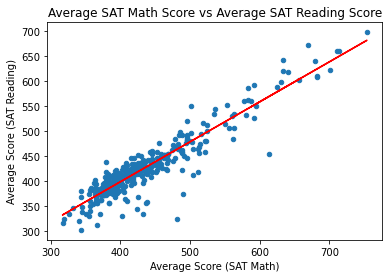

In [8]:
scatter_best_fit(data, "Average Score (SAT Math)", "Average Score (SAT Reading)")
plt.title("Average SAT Math Score vs Average SAT Reading Score")

In [135]:
#Correlation Coefficient between Average Score (SAT Math) and Average Score (SAT Reading)
math_reading = np.corrcoef(data["Average Score (SAT Math)"], data["Average Score (SAT Reading)"])[0][1]
print("The correlation coefficient between Average Score (SAT Math) and Average Score (SAT Reading) is ", math_reading)

The correlation coefficient between Average Score (SAT Math) and Average Score (SAT Reading) is  0.9280641264807197


Text(0.5, 1.0, 'Average SAT Math Score vs Average SAT Writing Score')

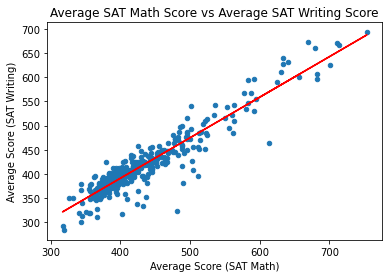

In [9]:
scatter_best_fit(data, "Average Score (SAT Math)", "Average Score (SAT Writing)")
plt.title("Average SAT Math Score vs Average SAT Writing Score")

In [136]:
#Correlation Coefficient between Average Score (SAT Math) and Average Score (SAT Writing)
math_writing = np.corrcoef(data["Average Score (SAT Math)"], data["Average Score (SAT Writing)"])[0][1]
print("The correlation coefficient between Average Score (SAT Math) and Average Score (SAT Writing) is ", math_writing)

The correlation coefficient between Average Score (SAT Math) and Average Score (SAT Writing) is  0.93398412772093


Text(0.5, 1.0, 'Average SAT Reading Score vs Average SAT Writing Score')

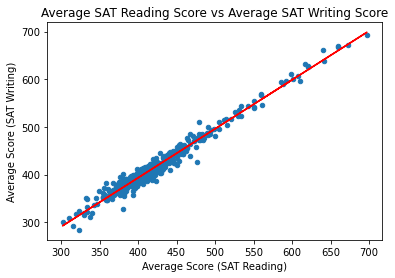

In [10]:
scatter_best_fit(data, "Average Score (SAT Reading)", "Average Score (SAT Writing)")
plt.title("Average SAT Reading Score vs Average SAT Writing Score")

In [137]:
#Correlation Coefficient between Average Score (SAT Reading) and Average Score (SAT Writing)
reading_writing = np.corrcoef(data["Average Score (SAT Reading)"], data["Average Score (SAT Writing)"])[0][1]
print("The correlation coefficient between Average Score (SAT Reading) and Average Score (SAT Writing) is ", reading_writing)

The correlation coefficient between Average Score (SAT Reading) and Average Score (SAT Writing) is  0.9854013570989723


When comparing the average scores between different parts of the SAT, the general association is that a higher score in one section is correlated with a higher score on another section of the SAT. It can be concluded that a high score is often correlated with high scores in the other sections. All of the correlation coefficients are also very large which means that there is a strong, positive linear association.

# Location <a name="locations"></a>
### Question : How does location correlate with SAT scores?
## Location According to Borough <a name="borough"></a>

### Data Exploration <a name="dataexplore"></a>

First, I grouped by borough to see the average SAT scores within each borough. I wanted to see if any particular borough was scoring significantly differently from the other boroughs.

In [11]:
borough_grouped = data.groupby(['Borough']).mean()
borough_grouped

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (Total)
Borough,,,,,,,,,,,,,
Bronx,10461.979592,40.845445,-73.889419,541.724490,3.121429,28.974490,62.711224,3.905102,404.357143,402.520408,395.846939,58.220408,1202.724490
Brooklyn,11216.211009,40.665302,-73.947209,742.550459,7.177064,54.989908,28.790826,7.447706,416.403670,410.761468,403.091743,62.423853,1230.256881
Manhattan,10024.438202,40.764681,-73.976222,638.089888,10.108989,25.425843,51.191011,11.173034,455.887640,444.932584,439.314607,71.197753,1340.134831
Queens,11355.911765,40.711839,-73.835470,1082.926471,10.920588,28.980882,34.377941,23.500000,461.558824,442.647059,439.220588,68.980882,1343.426471
Staten Island,10307.100000,40.595678,-74.125725,1846.000000,45.770000,16.780000,25.210000,10.740000,486.200000,478.500000,474.300000,67.390000,1439.000000


From the grouping, I found that Staten Island has average SAT scores that are significantly higher than the other boroughs. In comparison, the Bronx has the lowest average SAT scores. Staten Island also has the highest percentage of white students. The Bronx has the lowest percentage of white students.

### Visualizations <a name="bvis"></a>

#### Bar Graphs

Text(0.5, 1.0, 'Average SAT Scores by Borough')

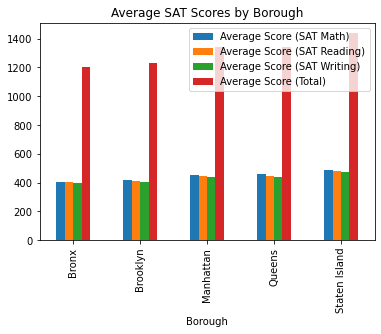

In [12]:
borough_scores = borough_grouped.iloc[0:5, [8,9,10,12]]
borough_scores.plot.bar(stacked = False)
plt.title ("Average SAT Scores by Borough")

In this bar graph, I can see that Staten Island has significantly higher scores than the other boroughs while the average scores from the Bronx is much lower than the other boroughs.

#### Scatter Plots

Text(0.5, 1.0, 'Percent White (by Borough) vs Average SAT Math Score')

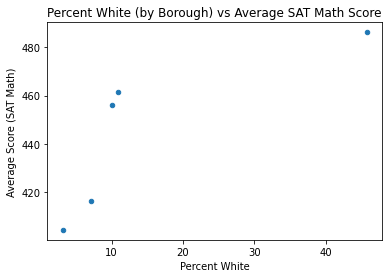

In [13]:
borough_grouped.plot(kind='scatter', x="Percent White", y="Average Score (SAT Math)")
plt.title('Percent White (by Borough) vs Average SAT Math Score')

Text(0.5, 1.0, 'Percent White (by Borough) vs Average SAT Reading Score')

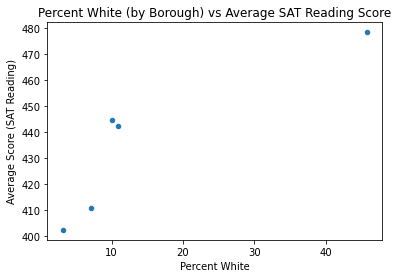

In [14]:
borough_grouped.plot(kind='scatter', x="Percent White", y="Average Score (SAT Reading)")
plt.title('Percent White (by Borough) vs Average SAT Reading Score')

Text(0.5, 1.0, 'Percent White (by Borough) vs Average SAT Writing Score')

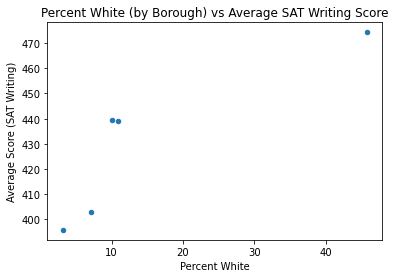

In [15]:
borough_grouped.plot(kind='scatter', x="Percent White", y="Average Score (SAT Writing)")
plt.title('Percent White (by Borough) vs Average SAT Writing Score')

Text(0.5, 1.0, 'Percent White (by Borough) vs Average SAT Total Score')

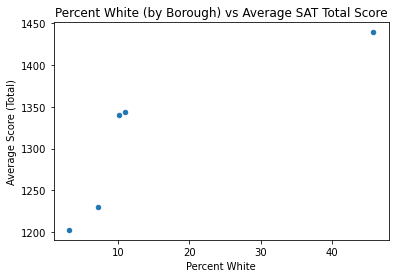

In [16]:
borough_grouped.plot(kind='scatter', x="Percent White", y="Average Score (Total)")
plt.title('Percent White (by Borough) vs Average SAT Total Score')

When also considering the percent white in a borough, the larger percent white a borough is, the better their SAT scores are. There is a positive correlation between the percent white and average SAT score, but causation cannot be concluded.

### ANOVA Testing <a name="ANOVA"></a>

#### Null Hypothesis
The average total SAT score is the same in every borough.
#### Alternative Hypothesis
The average total SAT score is not the same in each borough and there are differences between boroughs.

ANOVA Testing Note: For the ANOVA testing, I used the data table with the cleaned data instead of the borough_grouped table because ANOVA testing must have arrays with more than one value as the inputs. 

In [17]:
data

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (Total)
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7,3.1,5.5,88.9,613.0,453.0,463.0,95.9,1529.0
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,255.0,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7,1197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,381.0,2.1,49.1,43.6,4.2,372.0,362.0,352.0,44.6,1086.0
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,368.0,14.7,46.7,30.2,3.5,357.0,381.0,376.0,38.5,1114.0
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,683.0,10.7,53.2,29.1,6.0,427.0,430.0,423.0,76.6,1280.0
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,397.0,3.8,52.6,33.5,5.0,399.0,403.0,405.0,46.5,1207.0


#### Test Statistic and P-Value

In [18]:
f_oneway(data['Average Score (Total)'][data['Borough'] == 'Bronx'],
        data['Average Score (Total)'][data['Borough'] == 'Brooklyn'],
        data['Average Score (Total)'][data['Borough'] == 'Manhattan'],
        data['Average Score (Total)'][data['Borough'] == 'Queens'],
        data['Average Score (Total)'][data['Borough'] == 'Staten Island'],)

F_onewayResult(statistic=12.540601093553004, pvalue=1.4127177591719531e-09)

#### Eta-Squared

In [19]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

ss_b = 0
for i in boroughs:
    ss_b_borough = data['Average Score (Total)'][data['Borough'] == i].shape[0] * \
           np.sum((np.mean(data['Average Score (Total)'][data['Borough'] == i]) - np.mean(data['Average Score (Total)']))**2)
    ss_b = np.sum(np.append(ss_b, ss_b_borough))
    
ss_t = np.sum((data['Average Score (Total)'] - np.mean(data['Average Score (Total)']))**2)

eta_squared = ss_b/ss_t

eta_squared

0.1196729569511416

#### Conclusion
The null hypothesis is rejected. The testing is more consistent with the alternative hypothesis that there is a difference in the average total SAT score between boroughs. In the ANOVA testing, the p-value is 1.4127177591719531e-09 which is below the 0.05 cut-off. This means that the null hypothesis is very unlikely so the null hypothesis is rejected. 

Furthermore, the eta-squared is 0.12 which correlates to a medium effect when considering the size of the difference.

## Location According to Zip Code <a name="zip"></a>

I grouped by zip code to see the average SAT scores within each zip code. I wanted to see if any particular zip code was scoring significatly differently from the other zip codes.

### Data Exploration <a name="zipde"></a>

I grouped by zip code to see the average SAT scores within each zip codes. There are more zip codes than boroughs so grouping by zip codes would allow me to have more points to examine than grouping by boroughs. By using zip code, I can still examine the overall association between the percent of white students within a location and the average SAT scores within that location. 

In [48]:
zip_grouped = data[["Zip Code","Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)","Average Score (Total)", "Percent White"]].groupby(['Zip Code']).agg('mean')
zip_grouped

,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Average Score (Total),Percent White
Zip Code,,,,,
10002,472.909091,448.545455,437.454545,1358.909091,9.872727
10003,449.600000,443.400000,430.600000,1323.600000,17.040000
10004,463.000000,462.000000,455.250000,1380.250000,14.125000
10006,429.500000,419.000000,419.500000,1268.000000,5.800000
10009,454.000000,428.000000,445.000000,1327.000000,8.300000
...,...,...,...,...,...
11432,458.375000,440.750000,442.125000,1341.250000,3.337500
11433,598.500000,551.000000,549.000000,1698.500000,3.650000
11434,388.000000,401.500000,386.500000,1176.000000,1.650000


### Correlation <a name="corr"></a>

I evaluated for the correlation coefficients to first see if there was any correlation between the SAT scores and the percent of white students.

In [142]:
#Correlation coefficient for 'Percent White' and 'Average Score (SAT Math)'
            
white_math = np.corrcoef(zip_grouped['Percent White'], zip_grouped['Average Score (SAT Math)'])[0][1]
print("The correlation coefficient between Percent White) and Average Score (SAT Math) is ", white_math)

The correlation coefficient between Percent White) and Average Score (SAT Math) is  0.5401716223111783


In [143]:
#Correlation coefficient for 'Percent White' and 'Average Score (SAT Reading)'
            
white_reading = np.corrcoef(zip_grouped['Percent White'], zip_grouped['Average Score (SAT Reading)'])[0][1]
print("The correlation coefficient between Percent White and Average Score (SAT Reading) is ", white_reading)

The correlation coefficient between Percent White and Average Score (SAT Reading) is  0.5559855405532204


In [144]:
#Correlation coefficient for 'Percent White' and 'Average Score (SAT Writing)'
            
white_writing = np.corrcoef(zip_grouped['Percent White'], zip_grouped['Average Score (SAT Writing)'])[0][1]
print("The correlation coefficient Percent White and Average Score (SAT Writing) is ", white_writing)

The correlation coefficient Percent White and Average Score (SAT Writing) is  0.5661436915771859


In [145]:
#Correlation coefficient for 'Percent White' and 'Average Score (Total)'
            
white_total = np.corrcoef(zip_grouped['Percent White'], zip_grouped['Average Score (Total)'])[0][1]
print("The correlation coefficient between Percent White and Average Score (Total) is ", white_total)

The correlation coefficient between Percent White and Average Score (Total) is  0.5612902148444785


All of the average SAT scores in the zip codes have a positive correlation with the percentage of white students in that zip code. The correlations are moderately strong and positive.

### Visualizations <a name="zipvis"></a>

I created scatter plots with lines of best fit to compare the different average SAT scores of a zip code to examine possible correlations and relationships.

Text(0.5, 1.0, 'Percent White (by Zip Code) vs Average SAT Math Score')

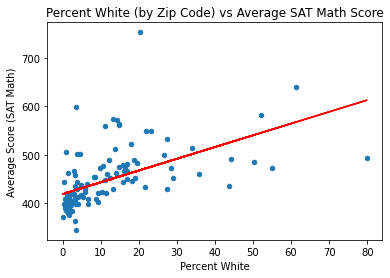

In [51]:
scatter_best_fit(zip_grouped, "Percent White", "Average Score (SAT Math)")
plt.title('Percent White (by Zip Code) vs Average SAT Math Score')

Text(0.5, 1.0, 'Percent White (by Zip Code) vs Average SAT Reading Score')

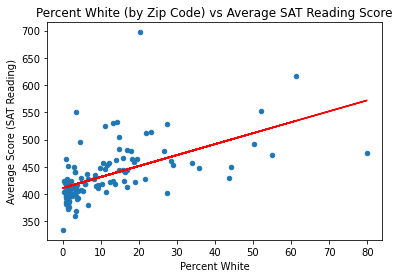

In [52]:
scatter_best_fit(zip_grouped, "Percent White", "Average Score (SAT Reading)")
plt.title('Percent White (by Zip Code) vs Average SAT Reading Score')

Text(0.5, 1.0, 'Percent White (by Zip Code) vs Average SAT Writing Score')

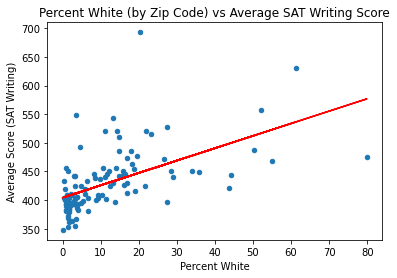

In [53]:
scatter_best_fit(zip_grouped, "Percent White", "Average Score (SAT Writing)")
plt.title('Percent White (by Zip Code) vs Average SAT Writing Score')

When grouping by zip code, it can be seen that the zip codes with a higher percent white generally had higher SAT scores. There is a positive correlation between the percent of white students and the average SAT score.

# Race <a name="race"></a>
### Question : How does race correlate with cummulative SAT scores?
## Scores According to Race
### Correlations <a name="racecorr"></a>

First, I found the correlations between the race percentages and different average SAT scores to establish that there is an association or correlation between these variables.

In [63]:
data

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (Total)
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0,1859.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1,1261.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7,3.1,5.5,88.9,613.0,453.0,463.0,95.9,1529.0
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,255.0,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7,1197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,381.0,2.1,49.1,43.6,4.2,372.0,362.0,352.0,44.6,1086.0
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,368.0,14.7,46.7,30.2,3.5,357.0,381.0,376.0,38.5,1114.0
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,683.0,10.7,53.2,29.1,6.0,427.0,430.0,423.0,76.6,1280.0
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,397.0,3.8,52.6,33.5,5.0,399.0,403.0,405.0,46.5,1207.0


In [149]:
#correlations between each race percentage and Average Score (SAT Math)

race_percents = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']

math_correlations = []

for percent in race_percents:
    math_race_correlation = (np.corrcoef(data[percent], data["Average Score (SAT Math)"])[0][1])
    math_correlations = np.append(math_correlations, math_race_correlation)
    
print("The correlation between percent white and Average Score (SAT Math) is ",(math_correlations[0]))
print("The correlation between percent Black and Average Score (SAT Math) is ",(math_correlations[1]))
print("The correlation between percent Hispanic and Average Score (SAT Math) is ",(math_correlations[2]))
print("The correlation between percent Asian and Average Score (SAT Math) is ",(math_correlations[3]))

The correlation between percent white and Average Score (SAT Math) is  0.598441108387989
The correlation between percent Black and Average Score (SAT Math) is  -0.37741270865296844
The correlation between percent Hispanic and Average Score (SAT Math) is  -0.3792708023440504
The correlation between percent Asian and Average Score (SAT Math) is  0.7164294211869368


In [148]:
#correlations between each race percentage and Average Score (SAT Reading)

reading_correlations = []

for percent in race_percents:
    reading_race_correlation = (np.corrcoef(data[percent], data["Average Score (SAT Reading)"])[0][1])
    reading_correlations = np.append(reading_correlations, reading_race_correlation)
    
print("The correlation between percent white and Average Score (SAT Reading) is ",(reading_correlations[0]))
print("The correlation between percent Black and Average Score (SAT Reading) is ",(reading_correlations[1]))
print("The correlation between percent Hispanic and Average Score (SAT Reading) is ",(reading_correlations[2]))
print("The correlation between percent Asian and Average Score (SAT Reading) is ",(reading_correlations[3]))

The correlation between percent white and Average Score (SAT Reading) is  0.6137838080058817
The correlation between percent Black and Average Score (SAT Reading) is  -0.2371007631819391
The correlation between percent Hispanic and Average Score (SAT Reading) is  -0.42257781394345306
The correlation between percent Asian and Average Score (SAT Reading) is  0.5198858211367433


In [147]:
#correlations between each race percentage and Average Score (SAT Writing)

writing_correlations = []

for percent in race_percents:
    writing_race_correlation = (np.corrcoef(data[percent], data["Average Score (SAT Writing)"])[0][1])
    writing_correlations = np.append(writing_correlations, writing_race_correlation)
    
print("The correlation between percent white and Average Score (SAT Writing) is ",(writing_correlations[0]))
print("The correlation between percent Black and Average Score (SAT Writing) is ",(writing_correlations[1]))
print("The correlation between percent Hispanic and Average Score (SAT Writing) is ",(writing_correlations[2]))
print("The correlation between percent Asian and Average Score (SAT Writing) is ",(writing_correlations[3]))

The correlation between percent white and Average Score (SAT Writing) is  0.6237040199775481
The correlation between percent Black and Average Score (SAT Writing) is  -0.26593689684388655
The correlation between percent Hispanic and Average Score (SAT Writing) is  -0.4106259065835302
The correlation between percent Asian and Average Score (SAT Writing) is  0.5415536861683351


In [146]:
#correlations between each race percentage and Average Score (lTota)

total_correlations = []

for percent in race_percents:
    total_race_correlation = (np.corrcoef(data[percent], data["Average Score (SAT Math)"])[0][1])
    total_correlations = np.append(total_correlations, total_race_correlation)
    
print("The correlation between percent white and Average Score (Total) is ",(total_correlations[0]))
print("The correlation between percent Black and Average Score (Total) is ",(total_correlations[1]))
print("The correlation between percent Hispanic and Average Score (Total) is ",(total_correlations[2]))
print("The correlation between percent Asian and Average Score (Total) is ",(total_correlations[3]))

The correlation between percent white and Average Score (Total) is  0.598441108387989
The correlation between percent Black and Average Score (Total) is  -0.37741270865296844
The correlation between percent Hispanic and Average Score (Total) is  -0.3792708023440504
The correlation between percent Asian and Average Score (Total) is  0.7164294211869368


### Visualizations <a name="racevis"></a>

Then I graphed by race percentage and average SAT scores of each school to see the correlation between race and SAT scores. The lines are the lines of best_fit from the scatter plots. I omitted the actual points from the scatter plot because it would be too cluttered if all the points for all the different race percentages where on the same graph. By putting all four lines on one plot, the contrasts are more easily seen.

In [29]:
def best_fit(x, y, color, label):
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color, label = label)

Text(0.5, 1.0, 'Percent of Race vs. Average SAT Math Score')

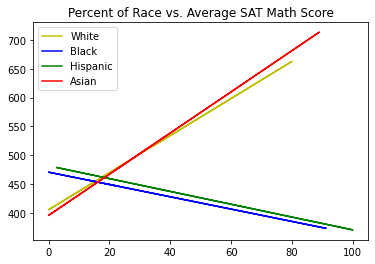

In [30]:
white = data["Percent White"]
black = data["Percent Black"]
hispanic = data["Percent Hispanic"]
asian = data["Percent Asian"]
math = data["Average Score (SAT Math)"]
reading = data["Average Score (SAT Reading)"]
writing = data["Average Score (SAT Writing)"]
total = data["Average Score (Total)"]


A, B = np.polyfit(white, math, 1)
plt.plot(white, A * white + B, 'y', label = "White")

C, D = np.polyfit(black, math, 1)
plt.plot(black, C*black + D, 'b', label = "Black")

E, F = np.polyfit(hispanic, math, 1)
plt.plot(hispanic, E*hispanic + F, 'g', label = "Hispanic")

G, H = np.polyfit(asian, math, 1)
plt.plot(asian, G*asian + H, 'r', label = "Asian")

plt.legend()
plt.title("Percent of Race vs. Average SAT Math Score")

Text(0.5, 1.0, 'Percent of Race vs. Average SAT Reading Score')

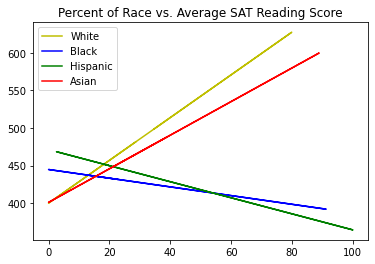

In [32]:
I, J = np.polyfit(white, reading, 1)
plt.plot(white, I*white + J, 'y', label = 'White')

K, L = np.polyfit(black, reading, 1)
plt.plot(black, K*black + L, 'b', label = "Black")

M, N = np.polyfit(hispanic, reading, 1)
plt.plot(hispanic, M*hispanic + N, 'g', label = "Hispanic")

O, P = np.polyfit(asian, reading, 1)
plt.plot(asian, O*asian + P, 'r', label = "Asian")

plt.legend()
plt.title("Percent of Race vs. Average SAT Reading Score")

Text(0.5, 1.0, 'Percent of Race vs. Average SAT Writing Score')

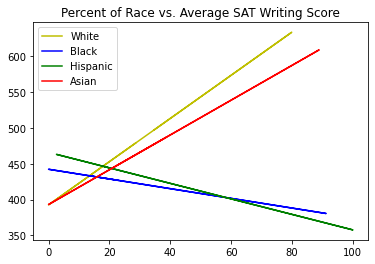

In [33]:
m, n = np.polyfit(white, writing, 1)
plt.plot(white, m*white + n, 'y', label = "White")

o, p = np.polyfit(black, writing, 1)
plt.plot(black, o*black + p, 'b', label = "Black")

q, r = np.polyfit(hispanic, writing, 1)
plt.plot(hispanic, q*hispanic + r, 'g', label = "Hispanic")

s, t = np.polyfit(asian, writing, 1)
plt.plot(asian, s*asian + t, 'r', label = "Asian")

plt.legend()
plt.title("Percent of Race vs. Average SAT Writing Score")

Text(0.5, 1.0, 'Percent of Race vs. Average Total SAT Score')

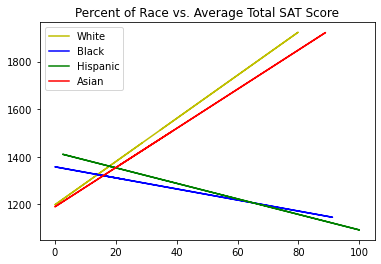

In [34]:
Q, R = np.polyfit(white, total, 1)
plt.plot(white, Q*white + R, 'y', label = 'White')

S, T = np.polyfit(black, total, 1)
plt.plot(black, S*black + T, 'b', label = "Black")

U, V = np.polyfit(hispanic, total, 1)
plt.plot(hispanic, U*hispanic + V, 'g', label = "Hispanic")

W, X = np.polyfit(asian, total, 1)
plt.plot(asian, W*asian + X, 'r', label = "Asian")

plt.legend()
plt.title("Percent of Race vs. Average Total SAT Score")

From the graphs, I found that there was a positive association between the percent of white students and the school's SAT scores. There was also a positive association between the percent of Asian students and the average SAT scores. In comparison, there was a negative association between the percent of Hispanic students and the average SAT scores. There was also a negative association between the percent of Black students and the average SAT scores.

# Conclusion <a name="conclusion"></a>
## Final Conclusion <a name="finc"></a>

### Average SAT Scores

There is a positive association between all of the Average SAT Scores of the schools. This suggests that the higher one student scores in one section of the SAT, they are also more likely to score well in a different part of the SAT. The positive correlation between the scores are clear and strong.

### Location

The average scores of each borough consistently followed the same order. Staten Island scored the highest. Queens and Manhatten had similar average scores. Brooklyn had lower scores than Queens and Manhatten. The Bronx had the lowest average score in each SAT category.

With the ANOVA testing, it can be concluded that the average SAT scores of the boroughs are not the same. The data is more consistent with the hypothesis that there is a difference between average SAT scores of each borough.

### Race

There was a positive correlation between the percentage of white and Asian students and the average SAT scores. There was a negative correlation between the percentage of Black and Hispanic students and the average SAT scores. These correlations were consistent throughout the different average SAT scores.

## Possible Explanations <a name="poss"></a>

### Average SAT Scores

Students who perform well in one section may be better prepared for the SAT. Because they are well-prepared for the SAT as a whole, they perform better on all the different sections instead of only performing well on one section.

### Location

Each borough or neighborhood has a different socioeconomic status. When there are students from a borough of a lower socioeconomic status, they may perform worse compared to students who come from affluent boroughs. These differences may stem from differences in school funding, quality of learning, stressors due to socioeconomic status, and quality of living.

### Race

Different races often live within their own borough or neighborhoods in their own communities. These neighborhoods may be linked with specific socioeconomic classes which could influence how prepared students are for the SAT. Race may not be the determining factor in how well students score, but the factors that associated with their race may influence their performance on the SAT. For example, the Black community has been marginalized and oppressed within the United States throughout history so they may not be at the same socioeconomic status as white people who have not been oppressed because of their skin color.

## Limitations <a name="lim"></a>

 - The goal of the exploration was to see how different factors influence education but SAT scores are proven to not be an accurate evaluation of school performance.
     - Using GPA or other assessments may be more accurate in analyzing how different factors influence education.
 - Some of the data was missing so those schools were not included in this analysis.
     - It may be more accurate to analyze data from individual students also instead of only looking at school averages.
 - Not all students take the SAT so the data pool is limited.
